In [2]:
!pwd

/home/guest/Desktop/faceSwap2


In [ ]:
# Install Onnxruntime and Insightface

!sudo pip install onnxruntime
!sudo pip install insightface

In [4]:
# Set up git user name and email

!git config --global user.email "cheatedepk@gmail.com"
!git config --global user.name "epk2112"


In [5]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image


In [6]:
# Show the version of insightface and Numpy

print('insightface', insightface.__version__)
print('numpy', np.__version__)

insightface 0.7.3
numpy 1.22.4


### Step 1: Detect Faces

In [ ]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

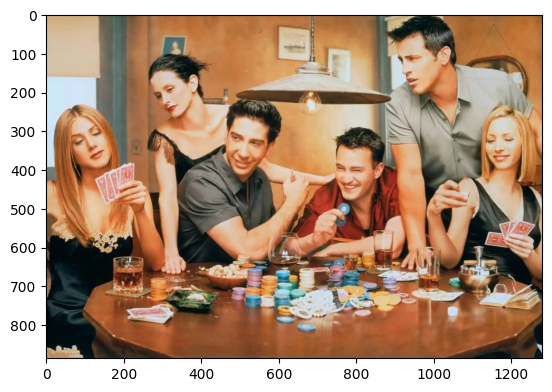

In [8]:
# Plot an example image
img = ins_get_image('t1')
plt.imshow(img[:, :, ::-1])
plt.show()

In [ ]:
# Get faces from the image
faces = app.get(img)

In [ ]:
# show the dictionary array of faces
faces

In [10]:
# Show the number of faces detected
len(faces)

6

In [11]:
# See the faces keys
faces[0].keys()

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

### Crop and Plot Faces

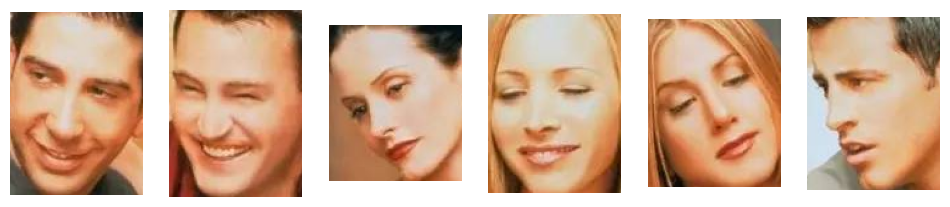

In [12]:
# Retrieve an image using the function ins_get_image('t1')
img = ins_get_image('t1')

# Create a figure with subplots using the subplots() function, 
# with the number of subplots equal to the number of faces detected
fig, axs = plt.subplots(1, len(faces), figsize=(12, 5))

# Iterate over each face detected
for i, face in enumerate(faces):
    # Extract the bounding box coordinates using the bbox key in the face dictionary
    bbox = face['bbox']
    # Convert the bounding box coordinates to integers
    bbox = [int(b) for b in bbox]
    # Crop the image using the bounding box coordinates and 
    # display it in the corresponding subplot using the imshow() function
    axs[i].imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
    # Turn off the axis display for each subplot using the axis() function
    axs[i].axis('off')

### Step 2: Face Swapping

In [13]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx',download=False,download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


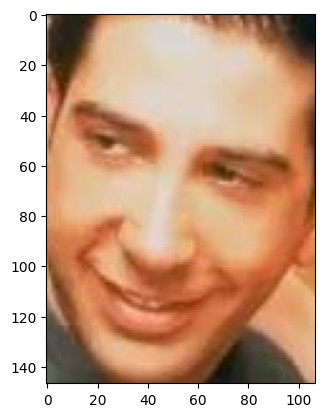

In [14]:
# Get any Source face and plot It
source_face = faces[0]
bbox = source_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
plt.show()

In [15]:
res = img.copy()
for face in faces:
    res = swapper.get(res, face, source_face, paste_back=True) 
    

### Plot the Swapped Faces

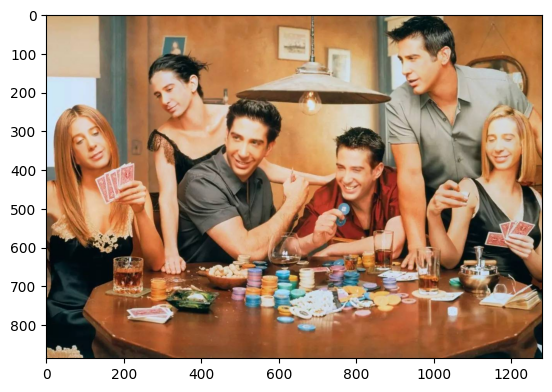

In [16]:
plt.imshow(res[:,:,::-1])
plt.show()

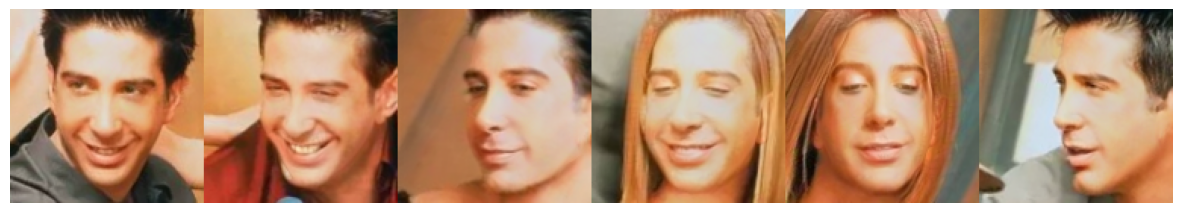

In [17]:
# Loop over all the faces and plot them Individually
res = []
for face in faces:
    _img, _ = swapper.get(img.copy(), face, source_face, paste_back=False)
    res.append(_img)
res = np.concatenate(res, axis=1)
fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(res[:,:,::-1])
ax.axis('off')
plt.show()


### Put My Face on  or Any Other Face

In [18]:
# Download a sample image using wget
_ = !wget -O the_rock.jpg 'https://ntvb.tmsimg.com/assets/assets/235135_v9_bb.jpg'

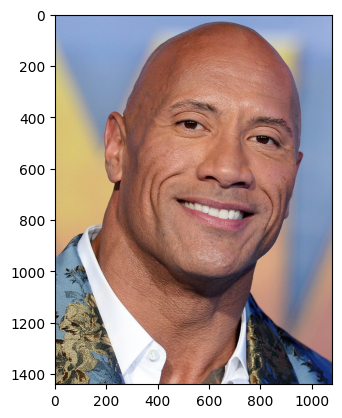

In [19]:
rob = cv2.imread('the_rock.jpg')
plt.imshow(rob[:,:,::-1])
plt.show()

### 1. Detect and Save my Face

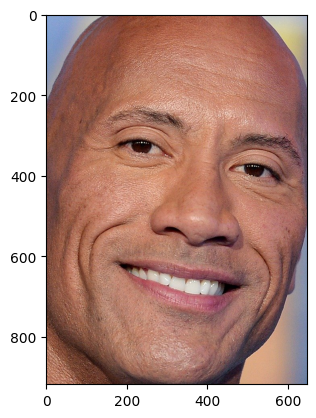

In [20]:
rob_faces = app.get(rob)
assert len(rob_faces) == 1
rob_face = rob_faces[0]
bbox = rob_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(rob[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

### 2. Detect Friend's faces

In [21]:
faces = app.get(img)

### 3. Swap my face for theirs on the image

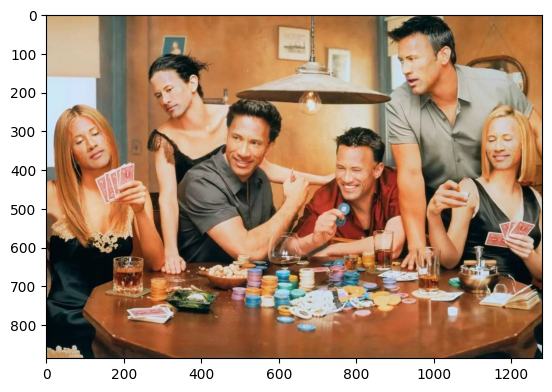

In [22]:
res = img.copy()
for face in faces:
    res = swapper.get(res, face, rob_face, paste_back=True)
plt.imshow(res[:,:,::-1])
plt.show() 